# LOGISTIC REGRESSION. 

This is a supervied machine learning algorithm that aims at predicting a category or class an entity belongs to. Logistic regression is a classification problem that can take two forms ; binomial/binary classification where there are two classes or multinomial/multiclass where outputs are three or more classes. While regression problems have continous variable outputs (unbounded) , classification analysis have discrete outcomes. 

Example of logistic regressions include : 
* Predicting whether an email is spam or not
* image recognition , determine whether an image is a dog or human
* predicting whether an employee will be promoted or not based on predioctors such as experience, education
* determining credit scores 
* predicting whether a patient has heat disease or not

The sigmoid function has values are either 1 or 0 or others very close to them, this property makes it suitable for use in logistic resression analysis problems. 

## Problem formulation. 
In this tutorial we will see how this algorith is used to predict heart disease (dependent variable, 𝑦ᵢ) given a set of predictor features (independent variables, 𝐱ᵢ) for observations 𝑖 = 1, ...., n. Like linear regression we start with a set of known values of predictors 𝐱ᵢ for corressponding value 𝑦ᵢ given observations 𝑖 = 1, .... , n. 

Our goal is to find a function p(x) such that predictor input p(x) is a s close as possible to actual values of 𝑦ᵢ in each observations in 𝑖. Expected values are values close to 0 or 1(actual responses). Assuming that the mathematicl dependence between training data and useen data is unchanged, the function will easily predict. 

Logistic regression is a linear classifier that uses a function called `logit` : 
                
                𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ₙ𝑥ₙ u

                𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱))
            
* 𝑏₀ , 𝑏₁ and  𝑏ᵣ are estimators of the regression coefficient, also called predicted weights.
* 𝑥₁ , 𝑥ₙ are predictor variables 
* 𝑝(𝐱) is the logistic function , which is the sigmoid function of 𝑓(𝐱)


This estimator optimises estimators/weights to ensure that predicted values are close to actual values using test dataset. This process is called model fitting. Once these values are found, a predicted value 𝑝(𝐱ᵢ) given an input 𝐱ᵢ can be determines easily. A threshold is set at 0.5 such that for each observation 𝑖, if value (𝑓(𝐱)) is 0.5 or greater predicted value is set to 1 ,else 0. Threshold is varied depending on use needs. So how do we end up with values 1 or 0, remember  𝑓(𝐱) is the logit function, where 𝑓(𝐱) = log(𝑝(𝐱) / (1 − 𝑝(𝐱))) . 

In [1]:
# Import modules 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
# Read datset 

data = pd.read_csv('C:/Users/Admin/Downloads/Heart.csv')

print(f'data sample : {data.head()} \n \
      data structure : {data.size} \n \
      data columns : {data.columns} \n \
      data shape {data.shape}')

data sample :    Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No   
       data structure : 4545 
       data columns : Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object') 
       d

# Explore and clean data 

In [3]:
# Find columns with missing values 
print(f'Missing data : {data.isnull().sum()}\n')

# Drop missing data 
new_data = data.dropna(axis=0, how='any')
print(f'\n Missing data : {new_data.isnull().sum()}')

Missing data : Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


 Missing data : Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


In [4]:
# Drop unwanted columns 

new_data = new_data.drop(columns=['Unnamed: 0'])
new_data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [5]:
# Change categporical data to numeric data 

# Chestpains 
new_data.ChestPain = new_data.ChestPain.astype('category')
new_data.ChestPain = new_data.ChestPain.cat.codes

# ADH , ACQUIRED HEART DISEASE 
new_data.AHD = new_data.AHD.astype('category')
new_data.AHD = new_data.AHD.cat.codes

# Thal
new_data.Thal = new_data.Thal.astype('category')
new_data.Thal = new_data.Thal.cat.codes

# View data
new_data


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


### Define trraining and test data.

We need to write a function that predicts whether a patient has heart disease in ADH column. All other features will be used as predictors, we start by spliting the data by randomly selecting 70% for training and remaining for test. 

In [6]:
# Define training features by creating feature variables 
X = new_data.drop(columns='AHD')
print(f'Training features : \n {X.head()}')

# Define labels 
y = new_data[['AHD']]
print(f'\n\n---------------------\n\n   Labels : \n {y.head()}')

Training features : 
    Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1          3     145   233    1        2    150      0      2.3   
1   67    1          0     160   286    0        2    108      1      1.5   
2   67    1          0     120   229    0        2    129      1      2.6   
3   37    1          1     130   250    0        0    187      0      3.5   
4   41    0          2     130   204    0        2    172      0      1.4   

   Slope   Ca  Thal  
0      3  0.0     0  
1      2  3.0     1  
2      2  2.0     2  
3      3  0.0     1  
4      1  0.0     1  


---------------------

   Labels : 
    AHD
0    0
1    1
2    1
3    0
4    0


In [7]:
# Split the data into training(70%) and testing data(30%) ,pick random rows 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

# View split data 
print(f'training data : {X_train} \n\n')

print(f'-----------------------\n test data : {X_test}')

training data :      Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
182   42    1          3     148   244    0        2    178      0      0.8   
279   58    0          0     130   197    0        0    131      0      0.6   
120   48    1          0     130   256    1        2    150      1      0.0   
77    51    0          1     140   308    0        2    142      0      1.5   
15    57    1          1     150   168    0        0    174      0      1.6   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
190   50    1          1     129   196    0        0    163      0      0.0   
121   63    0          0     150   407    0        2    154      0      4.0   
48    65    0          1     140   417    1        2    157      0      0.8   
263   44    1          1     120   226    0        0    169      0      0.0   
210   37    0          1     120   215    0        0    170      0      0.0   

     Slope   Ca  Thal  
182      1 

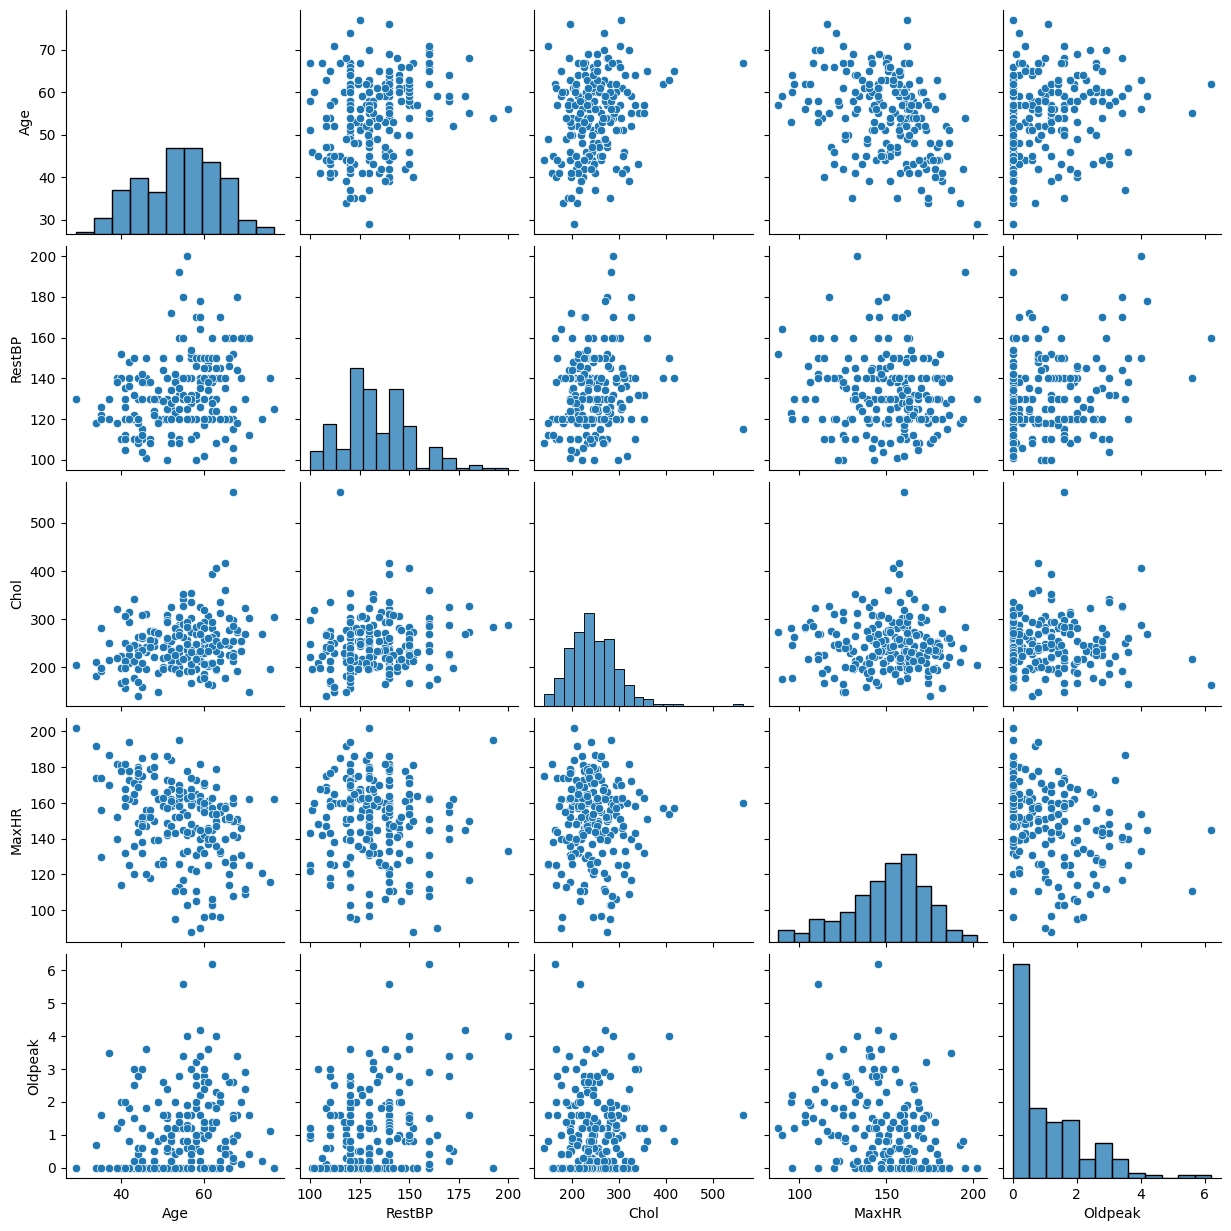

In [9]:
# View relationship between features in the dataframe using a pairwise plot. 

# Continous numerical variable 
attributes = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

# Plot scatter plot
sns.pairplot(X_train[attributes])

<Axes: >

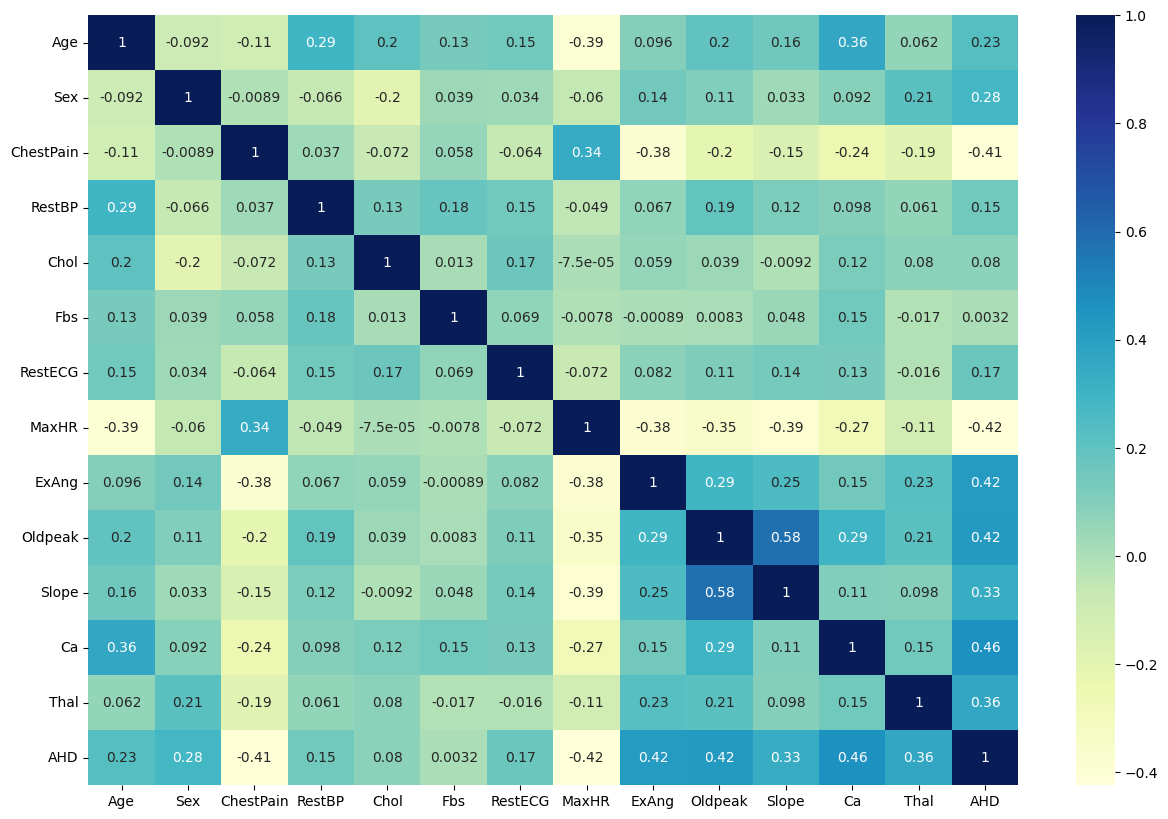

In [10]:
# Determine a correlation heatmap 

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(new_data.corr(), cmap="YlGnBu", annot=True)


### Scale the data.

Scalling is a critical pre-processing step that ensures all predictors are transformed to  a common scale. This ensure accurate training and improved performance of the model by reducing the biases and inconsistencies. Achieved trough normalising magnitude, distribution and range of data. This avoids a situation where a single feature has dominance over other in the algorithm performance by giving proportional weight effect. It also improves the speed of some algorithms during training as well as handling skewed data or outliers. There are two types of scalling techniques, normalisation and standardisation. We will use scikit learn algorithm that adopts the later which transforms features by subtracting the mean and dividing by its standard deviation. This method is mostly prefered because it maintains feature distribution by not bounding them to any specific range. 

x′ = (x - μ) / σ

 * **x′** - Scale data 
* **X** - observation 
* **μ** - mean 
* **σ** - standard deviation 

In [42]:
# Fit a scaler 

scaler = StandardScaler()

# Fit data to scaler, fit method learns the mean and variance(scaling parameters) of the data while transform 
# transforms all features using x′ 
X_train_scaled = scaler.fit_transform(X_train)

# also transfor the test data but do not fit because we do not want out model to be exposed to actual values that
# we will be predicting , just use the parameters learnt to transform
X_test_scaled = scaler.transform(X_test)

# Scaled data is transformed into 2 dimensional numpy array 
X_test_scaled


array([[-0.87741138, -1.46163047,  0.19042337, ...,  2.27669763,
        -0.69991324, -0.56627356],
       [-1.41476095, -1.46163047,  0.19042337, ..., -0.99605521,
        -0.69991324, -0.56627356],
       [-0.01765206,  0.68416745, -0.87491817, ...,  0.64032121,
         0.39767798,  1.15752977],
       ...,
       [-1.73717069,  0.68416745,  2.32110644, ...,  0.64032121,
        -0.69991324,  1.15752977],
       [ 0.51969751,  0.68416745,  2.32110644, ..., -0.99605521,
         1.49526919, -0.56627356],
       [ 1.05704708, -1.46163047, -0.87491817, ...,  0.64032121,
         1.49526919, -0.56627356]])

## Fit model.


In [ ]:
# Fit model. 

